In [14]:
import cv2 as cv
import os

name = 'gokul'

In [15]:
# Path of the file containing the images
PATH = os.path.join('training_images', name)

In [16]:
# """
# Model Architecture
# """

# # Importing the Keras libraries and packages
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense , Dropout
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# sz = 128
# # Step 1 - Building the CNN

# # Initializing the CNN
# classifier = Sequential()

# # First convolution layer and pooling
# classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# # Second convolution layer and pooling
# classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# # input_shape is going to be the pooled feature maps from the previous convolution layer
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# #classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# # input_shape is going to be the pooled feature maps from the previous convolution layer
# #classifier.add(MaxPooling2D(pool_size=(2, 2)))

# # Flattening the layers
# classifier.add(Flatten())

# # Adding a fully connected layer
# classifier.add(Dense(units=128, activation='relu'))
# classifier.add(Dropout(0.40))
# classifier.add(Dense(units=96, activation='relu'))
# classifier.add(Dropout(0.40))
# classifier.add(Dense(units=64, activation='relu'))
# classifier.add(Dense(units=26, activation='softmax')) # softmax for more than 2

In [17]:
# classifier

In [18]:
pwd

'f:\\Works\\Sign language\\Sign-language\\self_train'

In [19]:
cd ..

f:\Works\Sign language\Sign-language


In [20]:
# # Importing the model and setting all the current layers as non-trainable

# from keras.models import model_from_json

# final_model = ''

# with open("model-bw-2-json.json") as json_file:
#     final_model = model_from_json(json_file.read())
#     final_model.load_weights("model-bw-2.h5")

# i=0
# for layer in final_model.layers:
#     print(layer)
#     # i+=1
#     # if i != 11:
#     layer.trainable = False
#     # else:
#     #     break

In [21]:
# """
# "res_net.output" represents the final layer of res_net. We will add additional layers to this layer inorder to add for our situation.
# """
# import tensorflow as tf
# import keras
# from keras.layers import Dense, GlobalMaxPooling2D, Dropout

# # Here we will be adding a maxPooling layer

# # add_layer1 = MaxPooling2D(pool_size=(2, 2))
# add_layer1 = keras.Sequential([
#                                 # Adding a fully connected layer
#                                 Dense(units=128, activation='relu'),
#                                 Dropout(0.40),
#                                 Dense(units=96, activation='relu'),
#                                 Dropout(0.40),
#                                 Dense(units=64, activation='relu'),
#                                 Dense(units=26, activation='softmax') # softmax for more than 2
#                             ])

# # add_layer3 = MaxPooling2D(pool_size=(2, 2))

# # Adding the final dense layer (only 1 as it is a binary class)
# add_layer2 = Dense(26, activation='sigmoid')

# # Compiling the model
# final_model = keras.Sequential([final_model, 
#                                 # add_layer1,
#                                 add_layer1])

# # Displaying the model summary
# final_model.summary()

In [22]:
# import tensorflow as tf
# # tf.keras.losses.BinaryCrossentropy

# final_model.compile(
#     optimizer='adam',
#     loss = 'categorical_crossentropy',
#     metrics=['accuracy']
# )

In [23]:
from keras.applications.mobilenet import MobileNet
# Here we load the ResNet model with the trained weights of imagenet but not includeing the final layer as well will add additional layers
# over here to train for our application

img_size = [224, 224]
img_size = img_size + [3]
print(img_size)

res_net_base = MobileNet(input_shape= img_size, weights='imagenet', include_top=False)
# Supplying weights="imagenet" indicates that we want to use the pre-trained ImageNet weights for the respective model.

# Setting all the current layers as non-trainable
for layer in res_net_base.layers:
    layer.trainable = False

[224, 224, 3]


In [24]:
"""
"res_net.output" represents the final layer of res_net. We will add additional layers to this layer inorder to add for our situation.
"""
import keras
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten

final_model = keras.Sequential(res_net_base)
final_model.add(Flatten())

# Here we will be adding a maxPooling layer)
final_model.add(Dense(96, activation='relu'))
final_model.add(Dropout(0.40))
final_model.add(Dense(64, activation='relu'))


# Adding the final dense layer (only 1 as it is a binary class)
final_model.add(Dense(26, activation='sigmoid'))

# Displaying the model summary
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 96)                4816992   
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                6208      
                                                                 
 dense_5 (Dense)             (None, 26)                1690      
                                                      

In [25]:
import tensorflow as tf
# tf.keras.losses.BinaryCrossentropy

final_model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.5,)
        # width_shift_range=0.1,
        # height_shift_range=0.1,)

test_datagen = ImageDataGenerator(
        rescale=1./255)

sz   = 224
batch_size = 100

data_dir_tr = os.path.join(PATH, 'train')
data_dir_ts = os.path.join(PATH, 'test')


training_set = train_datagen.flow_from_directory(data_dir_tr,
                                                 target_size=(sz, sz),
                                                 batch_size=18,
                                                 color_mode='rgb',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(data_dir_ts,
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='rgb',
                                            class_mode='categorical') 



Found 1820 images belonging to 26 classes.
Found 780 images belonging to 26 classes.


label -  (18, 26)
image -  (18, 224, 224, 3)
(224, 224, 3)


[]

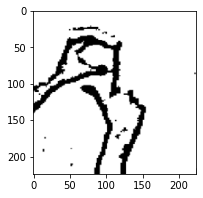

In [32]:
import numpy as np
image, label = training_set.next()
print('label - ',np.shape(label))
print('image - ',np.shape(image))
from matplotlib import pyplot as plt
img = image[0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

print(np.shape(img))
ax.imshow(img)
ax.plot()


In [34]:
letters= ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letters[np.argmax(label[0])]

'd'

In [30]:
final_model.fit(
                training_set,
                steps_per_epoch= 100, # No of images in training set
                epochs=25,
                validation_data=test_set,
                validation_steps=77)# No of images in test set

Epoch 1/25
100/100 [==============================] - 42s 414ms/step - loss: 1.7293 - accuracy: 0.4400 - val_loss: 1.0898 - val_accuracy: 0.6532
Epoch 2/25
100/100 [==============================] - 41s 411ms/step - loss: 1.6270 - accuracy: 0.4669 - val_loss: 0.9746 - val_accuracy: 0.6948
Epoch 3/25
100/100 [==============================] - 42s 424ms/step - loss: 1.7155 - accuracy: 0.4624 - val_loss: 1.2169 - val_accuracy: 0.7156
Epoch 4/25
100/100 [==============================] - 43s 433ms/step - loss: 1.6761 - accuracy: 0.4619 - val_loss: 0.7245 - val_accuracy: 0.8156
Epoch 5/25
100/100 [==============================] - 41s 407ms/step - loss: 1.5858 - accuracy: 0.5056 - val_loss: 0.7199 - val_accuracy: 0.7870
Epoch 6/25
100/100 [==============================] - 41s 409ms/step - loss: 1.6824 - accuracy: 0.4658 - val_loss: 0.9453 - val_accuracy: 0.7052
Epoch 7/25
100/100 [==============================] - 44s 444ms/step - loss: 1.6398 - accuracy: 0.4826 - val_loss: 0.6451 - val_ac

In [35]:
index = np.argmax(final_model.predict(np.array([img])))
print(letters[index])

d


In [36]:
final_model.save(os.path.join('Models-final', name + '_Model.h5'))